In [2]:
# matris işlemleri için
import numpy as np
# grafik kütüphanesi 
import matplotlib.pylab as plt
# matplotlib grafiklerini jupyter note book üzerinde göstermek için
%matplotlib inline
# rasgele sayı üretimi için
import random

In [3]:
# Eğitim için kaydettiğimiz training.py dosyasını okuyoruz
PATH='../deep_learning/data/002/'
data = np.load(PATH+'training_data.npy')

In [4]:
# Seyir dosaysındaki sutun başlıkları
data[1]

array(['00003.jpg', '0.0', '0.0'], dtype='<U21')

In [5]:
# 20 den 40 kadar kayıtlar
data[20:30]

array([['00022.jpg', '0.0', '0.0'],
       ['00023.jpg', '0.0', '0.0'],
       ['00024.jpg', '0.0', '0.0'],
       ['00025.jpg', '0.0', '0.0'],
       ['00026.jpg', '0.0', '0.0'],
       ['00027.jpg', '0.0', '0.0'],
       ['00028.jpg', '0.0', '0.0'],
       ['00029.jpg', '0.0', '0.0'],
       ['00030.jpg', '0.0', '0.0'],
       ['00031.jpg', '0.0', '0.0']], dtype='<U21')

In [6]:
# Toplam kayıt sayımız
len(data)

128

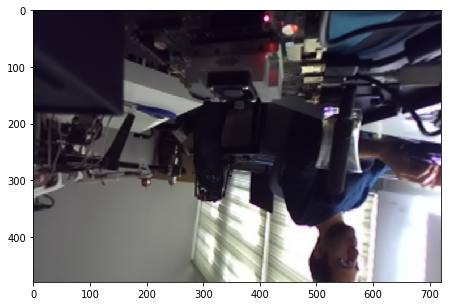

In [11]:
# Kayıt ettğimiz resmin birine bakıyoruz
from PIL import Image
image = Image.open(PATH+data[30][0])
plt.figure(figsize=(15,5))
plt.imshow(image)

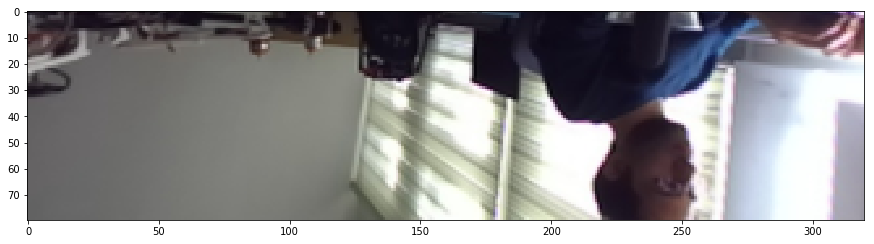

In [15]:

image = np.asarray(image.resize((320, 180), Image.ANTIALIAS))
plt.figure(figsize=(15,5))
plt.imshow(image[100:,:,:]) #Cropped image 

In [21]:
images = list(img[0] for img in data[1:])
labels = list(float(img[2]) for img in data[1:])

In [23]:
len(images)

127

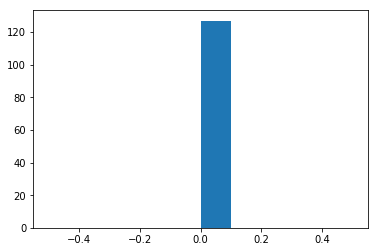

In [24]:
# Verimizdeki açıların dağılımı nasıl diye bir histogram yapıp bakıyoruz
# Dağılımın eşit şekilde olmaması eğitimin de düzgün olmamasına sebep olur
plt.hist(labels)
plt.show()

# Augmentasyon işlemi

 Augmentasyon işlemini tamamladıktan sonra **model_trainer.py** dosyasında ilgili yere aşağıdaki kod bloğunu yapıştırın.

In [25]:
# Veri setindeki açı dağılımını bir paröa düzeltmek için
# sayısı az olan açıdaki kayıtları listeye yeniden ekleyerek 
# daha düzgün hale getirmeye çalışıyoruz

nitem = len(images)
for i in range(nitem):
    if labels[i] > 0.05:
        for j in range(7):
            images.append(images[i])
            labels.append(labels[i])    
    if labels[i] < -0.07:
        for j in range(2):
            images.append(images[i])
            labels.append(labels[i]) 

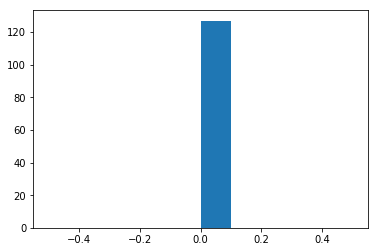

In [26]:
# İlk histgorama göre daga dengeli sayılabilecek bir dağılıma ulaştık
# En doğru çözüm değil ama pratik işe yarar bir alternatif
plt.hist(labels)
plt.show()

In [27]:
len(images), len(labels)

(127, 127)